In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
dataname = "CH_data"
test_or_train = "test"

change_dir = "seed"

if change_dir == "dropout":
    change_vals = [0.0, 0.2, 0.4, 0.6, 0.8, 0.34, 0.38, 0.42, 0.46]
elif change_dir == "seed":
    change_vals = [42, 666, 2023, 1, 3]



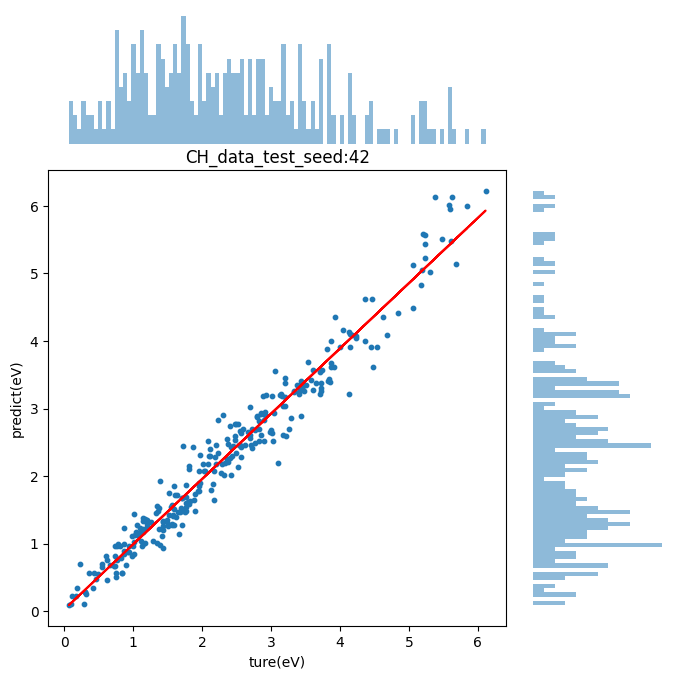

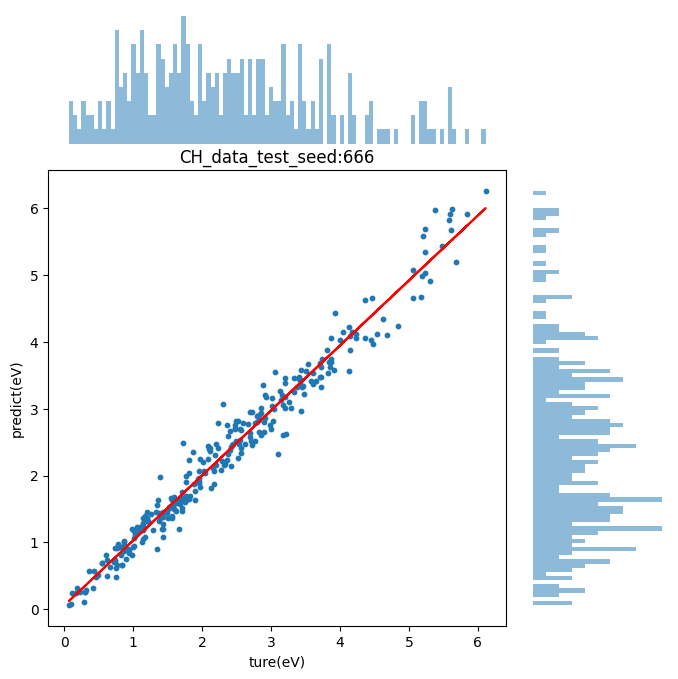

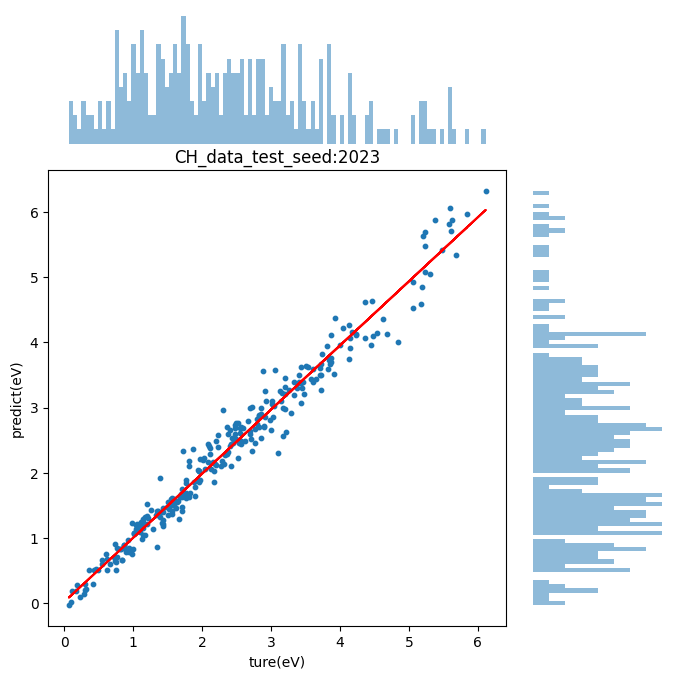

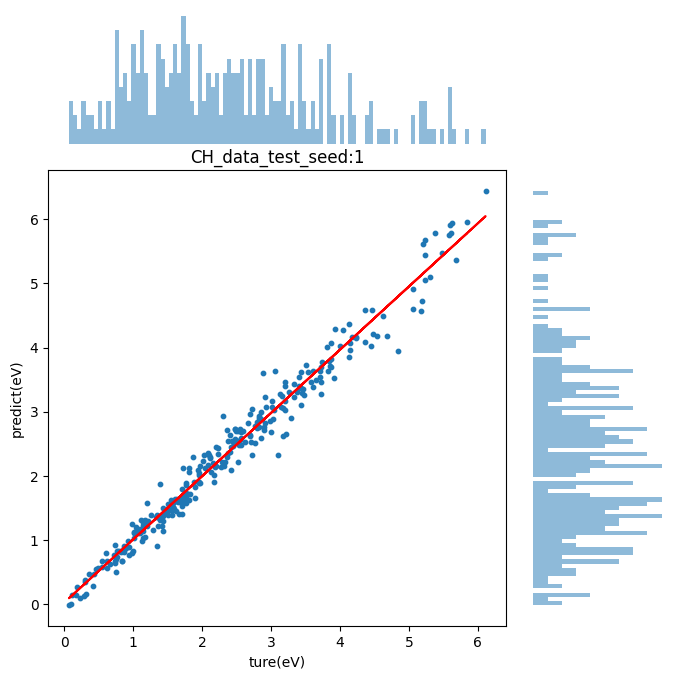

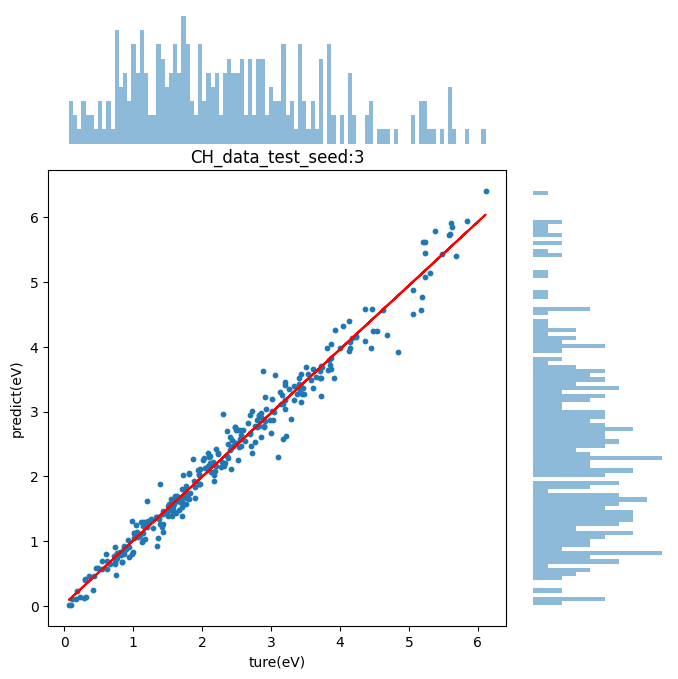

In [11]:
for change_val in change_vals:
    data = np.loadtxt(f'result/{change_dir}/{dataname}_{change_dir}{change_val}_predict_{test_or_train}.txt')

    x = data[:, 0]
    y = data[:, 1]

    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    fig = plt.figure(figsize=(8, 8))

    gs = fig.add_gridspec(4, 4)

    ax = fig.add_subplot(gs[1:4, :3])
    axx = fig.add_subplot(gs[0, :3], sharex=ax)
    axy = fig.add_subplot(gs[1:4, 3], sharey=ax)

    ax.scatter(x, y, s=10)
    ax.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

    axx.hist(x, bins=100, alpha=0.5)
    axy.hist(y, bins=100, orientation='horizontal', alpha=0.5)

    axx.axis('off')
    axy.axis('off')
    ax.set_title(f"{dataname}_{test_or_train}_{change_dir}:{change_val}")
    ax.set_xlabel("ture(eV)")
    ax.set_ylabel("predict(eV)")
    plt.savefig(f"resultplot/all_data/{dataname}_{change_dir}{change_val}_predict_{test_or_train}.png")
    plt.show()
    plt.close()